<a href="https://colab.research.google.com/github/Satorumi/Machine-Learning/blob/main/DecisionTree_w_skleanr%26xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Trees and Random Forests**

Course: [Machine Learning with Python: Zero to GBMs](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/decision-trees-and-hyperparameters)

In this assignment, I'll build on the previous assignment to predict the price of a house using information like its location, area, no. of rooms etc. The dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on `Kaggle`.

Step-by-step process:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model

In [1]:
!pip install xgboost --upgrade --quiet
!pip install yellowbrick==1.3
!pip install scikit-learn==0.22.2
!pip install graphviz --upgrade --quiet

     |████████████████████████████████| 166.7 MB 6.3 kB/s 
     |████████████████████████████████| 271 kB 8.8 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1
     |████████████████████████████████| 7.1 MB 7.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve
import sklearn
sklearn.__version__

'0.22.2'

### Downloading Dataset

Using `datasets` libraries to download dataset from Kaggle

In [3]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['data_description.txt', 'train.csv', 'test.csv', 'sample_submission.csv']

  Create dataframe for `train dataset` and `test dataset`. Note: `test_dataset` does not have SalePrice column

In [4]:
import pandas as pd 

In [5]:
train_dataset = pd.read_csv('house-prices/train.csv')
test_dataset = pd.read_csv('house-prices/test.csv')

### EDA - Exploratory Data Analysis
Reference: [House Prices EDA](https://www.kaggle.com/dgawlik/house-prices-eda)

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.linear_model as linear_model
import seaborn as sns

Setting plotting configure

In [7]:
sns.color_palette(palette='vlag', as_cmap=True)
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.max_open_warning'] = 1

Select `numerical` column and `categorical` column

In [8]:
quantitative = train_dataset.select_dtypes(include=np.number).columns[1:-1]
qualitative = train_dataset.select_dtypes(exclude=np.number).columns

Identify Missing Data

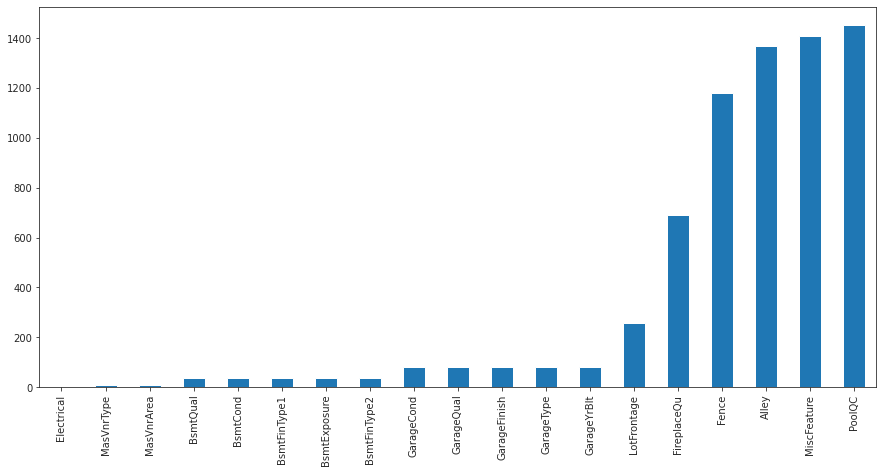

In [9]:
missing_data = train_dataset.isnull().sum()
missing_data = missing_data[missing_data.values > 0]
missing_data.sort_values(inplace=True)
missing_data.plot.bar();

`SalePrice` Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

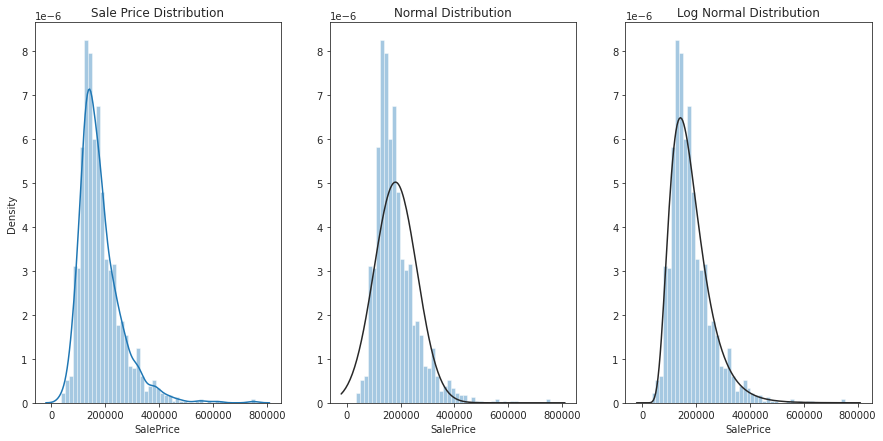

In [10]:
plt.subplot(1, 3, 1)
sns.distplot(train_dataset['SalePrice'])
plt.title('Sale Price Distribution')

plt.subplot(1, 3, 2)
sns.distplot(train_dataset['SalePrice'], kde=False, fit=stats.norm)
plt.title('Normal Distribution')

plt.subplot(1, 3, 3)
sns.distplot(train_dataset['SalePrice'], kde=False, fit=stats.lognorm)
plt.title('Log Normal Distribution');

Correlation Matrix

[Reference Code](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)

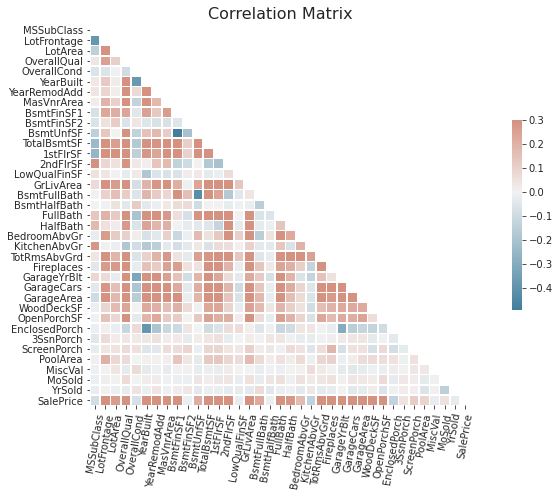

In [11]:
corr_matrix = train_dataset.drop(columns=['Id']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig.set_xticklabels(fig.get_xticklabels(), rotation=80)
plt.title('Correlation Matrix', fontsize=16);

#####Quantitive values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

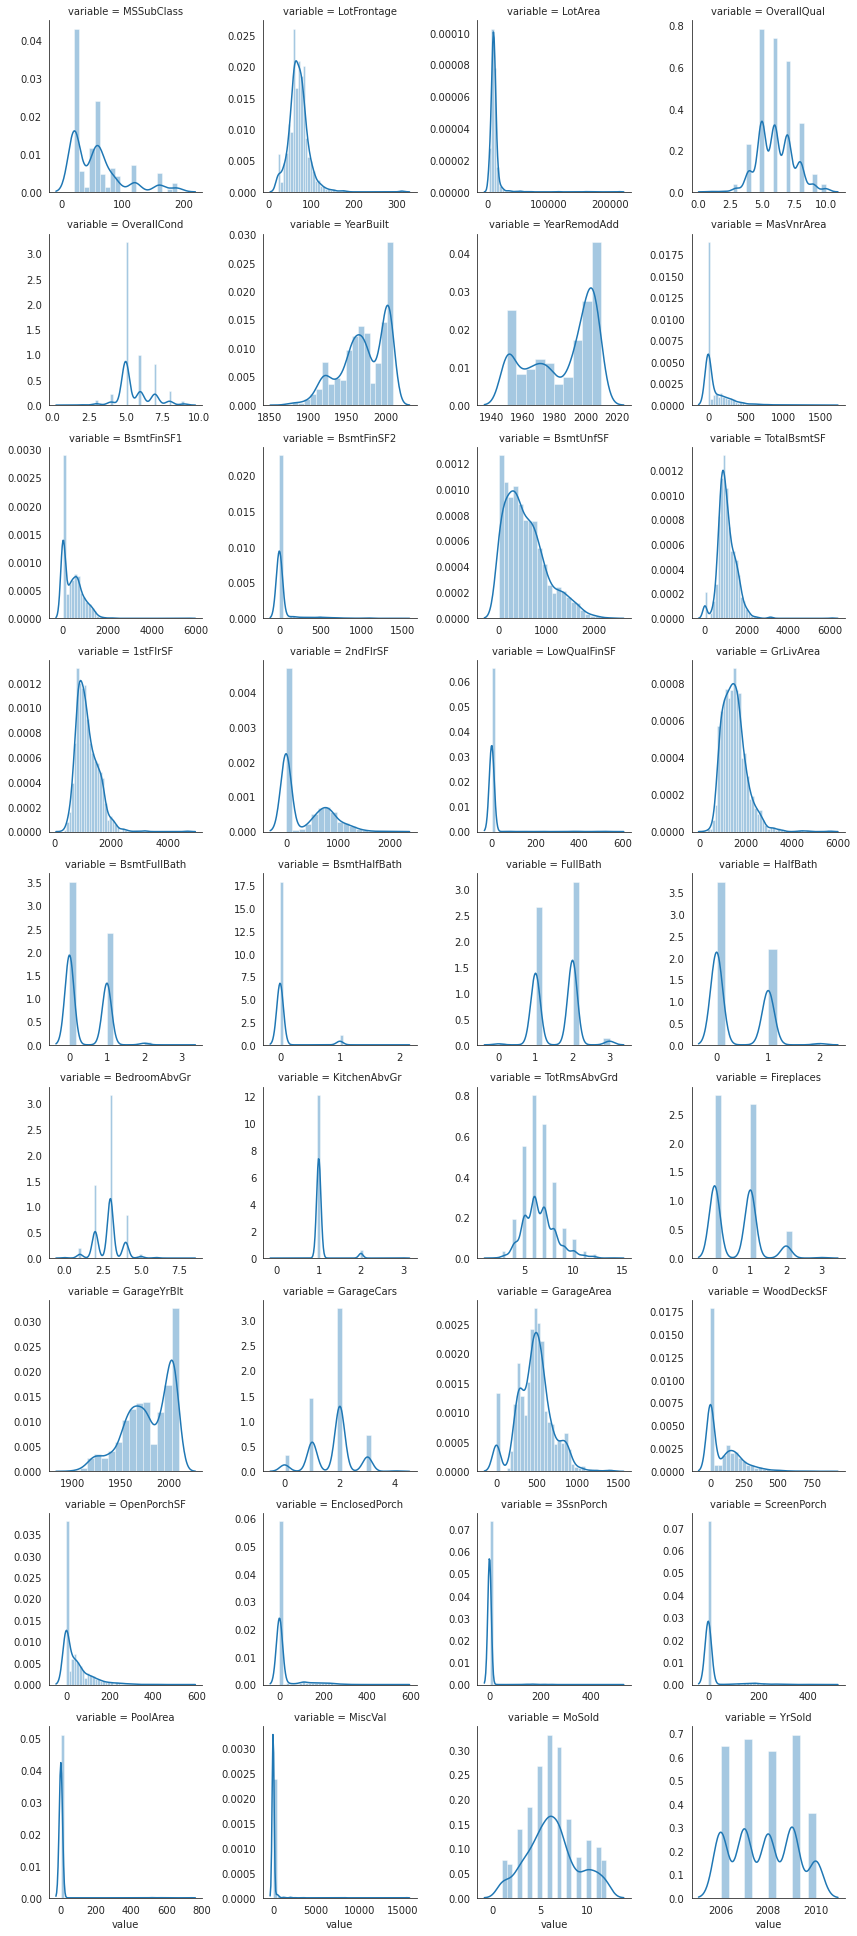

In [12]:
sns.set_style('white')
quantitative_df = pd.melt(train_dataset, value_vars=quantitative)

grids = sns.FacetGrid(quantitative_df, col='variable', col_wrap=4, sharex=False, sharey=False)
quantitaive_plot = grids.map(sns.distplot, 'value', kde=True);

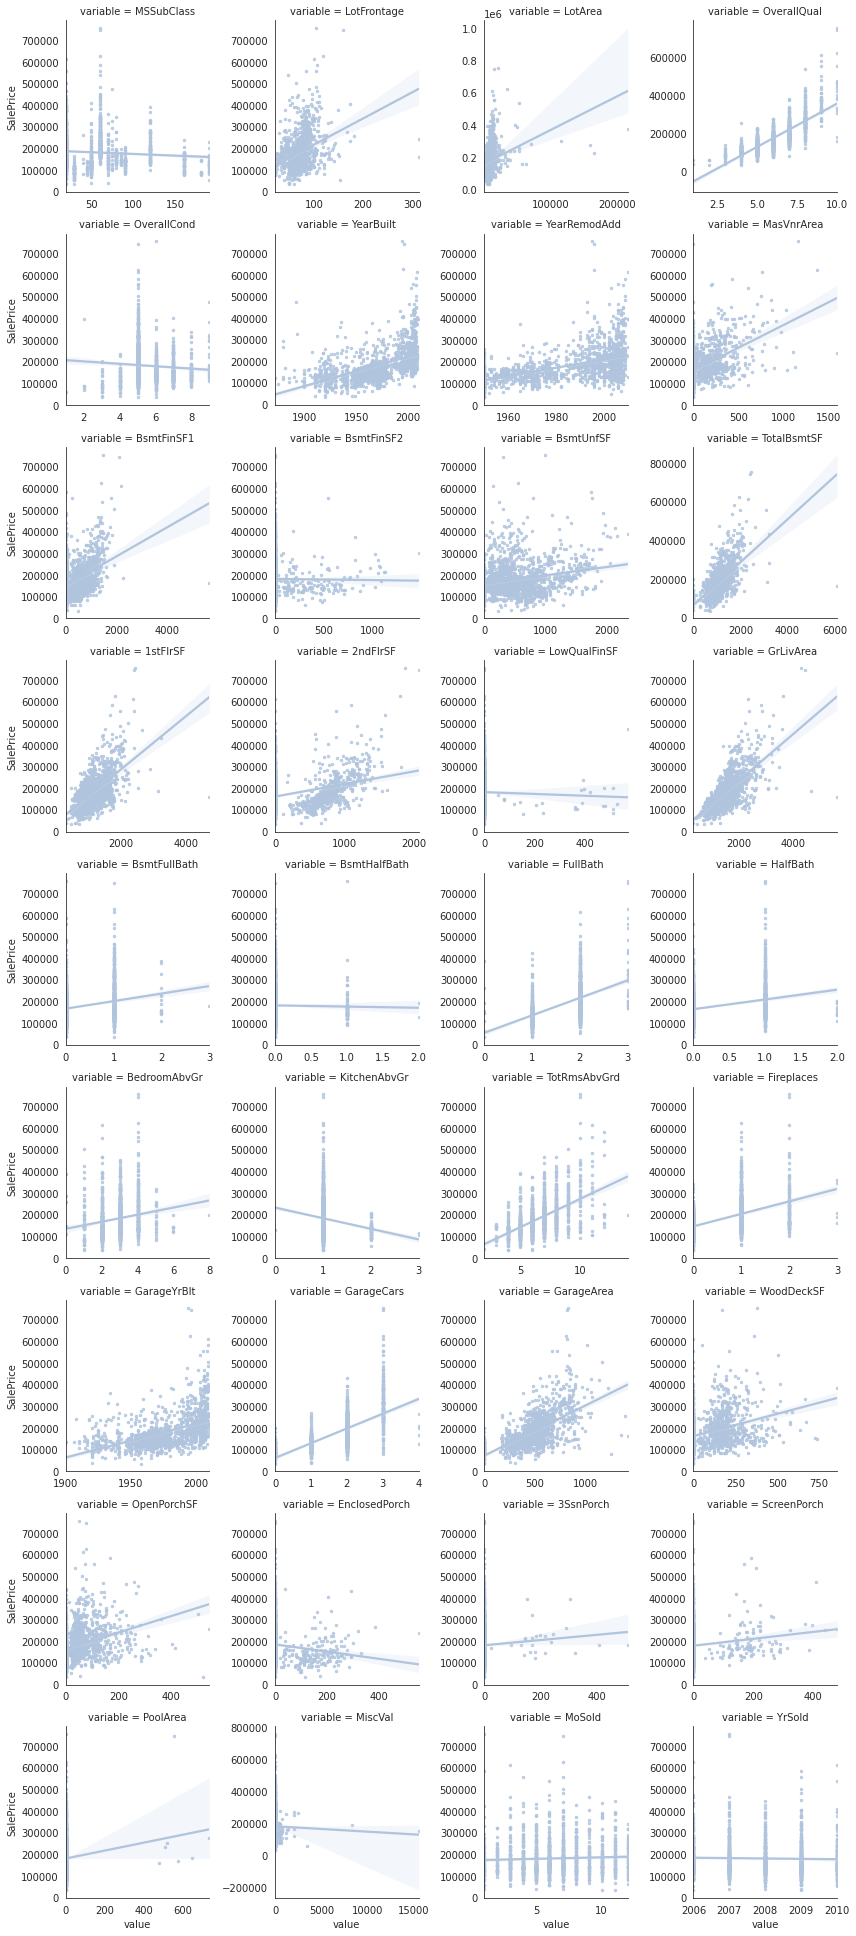

In [13]:
sns.set_style('white')
quantitative_df = pd.melt(train_dataset, id_vars=['SalePrice'], value_vars=quantitative)

grids = sns.FacetGrid(quantitative_df, col='variable', col_wrap=4, sharex=False, sharey=False)
quantitaive_plot = grids.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'s': 6}, color='lightsteelblue');

####Categorical Values

Fill missing values with `MISSING`

In [14]:
for col in qualitative:
  train_dataset[col] = train_dataset[col].astype('category')
  test_dataset[col] = test_dataset[col].astype('category')
  if train_dataset[col].isnull().any():
    train_dataset[col] = train_dataset[col].cat.add_categories(['MISSING'])
    train_dataset[col] = train_dataset[col].fillna('MISSING') # fill all null val with 'MISSING'
  if test_dataset[col].isnull().any():
    test_dataset[col] = test_dataset[col].cat.add_categories(['MISSING'])
    test_dataset[col] = test_dataset[col].fillna('MISSING') # fill all null val with 'MISSING'

Categorical Columns Distribution with `SalePrice`

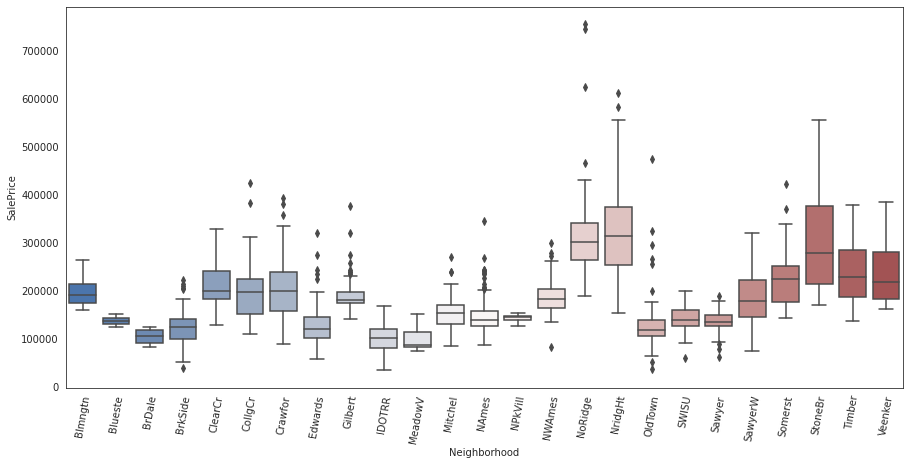

In [18]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_dataset, palette='vlag')
plt.xticks(rotation=80);

In [19]:
categorical_df = pd.melt(train_dataset, id_vars=['SalePrice'], value_vars=qualitative.drop(['Neighborhood']))

In [20]:
def hboxplot(x, y, **kwargs):
  sns.boxplot(x=x, y=y, orient='h', palette='vlag', width=.6, **kwargs)
  plt.xticks(rotation=90)

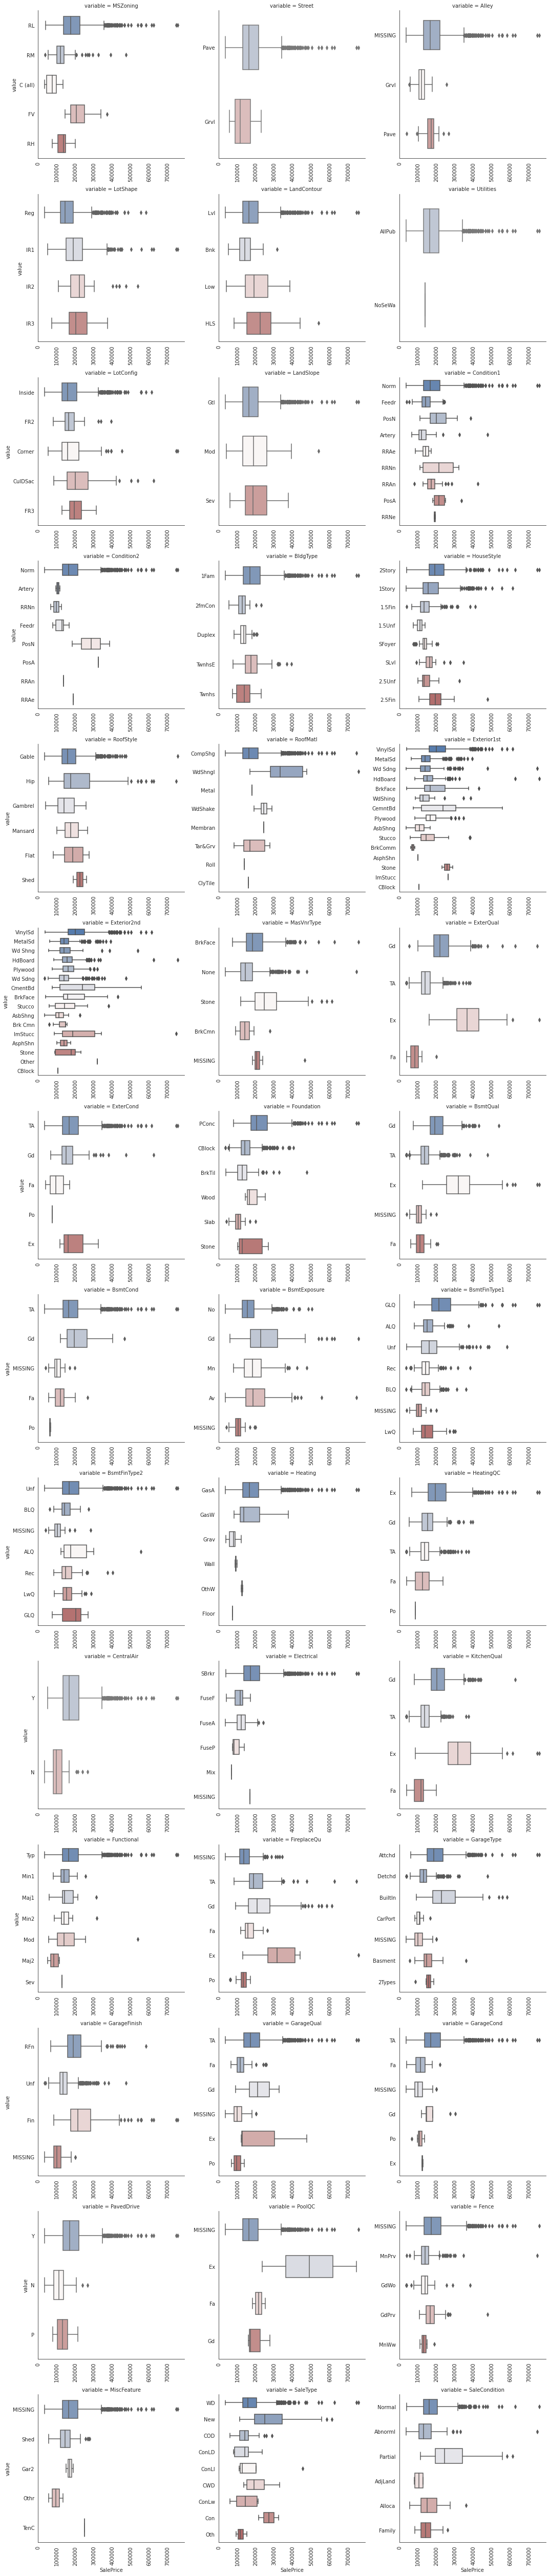

In [21]:
grids = sns.FacetGrid(categorical_df, col="variable", col_wrap=3, sharex=False, sharey=False, margin_titles=True, height=5)
catergorical_plot = grids.map(hboxplot, "SalePrice", "value")

### Data Preparation for Training

Identify `features` columns and `targets` - `SalePrice` column

In [22]:
features_columns = train_dataset.drop(['SalePrice', 'Id'], axis=1).columns
target_column = 'SalePrice'
train_features = train_dataset[features_columns].copy(deep=True)
train_targets = train_dataset[target_column].copy()

test_features = test_dataset[features_columns].copy(deep=True)

There is several columns with null values. We'll drop columns with large number of nan values and use `SimpleImputer` from scikit-learn to handle missing values on the numerical columns

In [23]:
train_features.drop(columns=['PoolQC', 'MiscFeature', 'Alley'], inplace=True)
test_features.drop(columns=['PoolQC', 'MiscFeature', 'Alley'], inplace=True)

In [24]:
train_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Define `numerical` and `categorical` columns

In [25]:
numerical_columns = train_features.select_dtypes(include=np.number).columns
categorical_columns = train_features.select_dtypes(exclude=np.number).columns

Impute Missing value with `SimpleImputer`

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
train_features[numerical_columns] = SimpleImputer(strategy='mean').fit_transform(train_features[numerical_columns])
test_features[numerical_columns] = SimpleImputer(strategy='mean').fit_transform(test_features[numerical_columns])

Scalling `Numeric` Values with `MinMaxScaler` and `Encoding` `Categorical` data

In [28]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [29]:
train_features[numerical_columns] = MinMaxScaler().fit_transform(train_features[numerical_columns])
test_features[numerical_columns] = MinMaxScaler().fit_transform(test_features[numerical_columns])

In [30]:
encoder = OrdinalEncoder()
train_features[categorical_columns] = encoder.fit_transform(train_features[categorical_columns])
test_features[categorical_columns] = encoder.fit_transform(test_features[categorical_columns])

Creating an `Validation Set`

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_features, val_features, train_targets, val_targets = train_test_split(train_features, train_targets, test_size=0.2, random_state=42)

### Model

In [33]:
from yellowbrick.model_selection import feature_importances
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot

### **Decision Tree**

#### **Sklearn DecisionTreeRegressor**

Building `DecisionTreeRegressor`

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Using `GridSearchCV` to tune Hyperparameters

In [35]:
DecisionTree = GridSearchCV(DecisionTreeRegressor(criterion='mse', random_state=42), 
                            {'max_depth': [10, 20, 30, 35],
                             'max_features': [8, 10, 12, 15, 18]},
                            scoring='neg_mean_squared_error')

In [36]:
%%time
TreeRegressors = DecisionTree.fit(train_features, train_targets)

CPU times: user 690 ms, sys: 1.94 ms, total: 692 ms
Wall time: 690 ms


Tuning Results: `cv_results_` represent a dict which store all results for different hyperparameters tested. Other attributes like `best_score_`, `best_params_` can be used to evaluate the best parameters

In [37]:
cv_results = pd.DataFrame(TreeRegressors.cv_results_)

In [38]:
best_tree = TreeRegressors.best_estimator_

Calling predict on model with the best params

In [39]:
val_pred = best_tree.predict(val_features)
val_pred[:10]

array([138235.34482759, 282853.33333333, 110517.85714286, 130333.33333333,
       363130.71428571,  81750.        , 174166.66666667, 148400.        ,
        81750.        , 101933.33333333])

##### Model Evaluation

In [40]:
r2_train = best_tree.score(train_features, train_targets)
r2_val = best_tree.score(val_features, val_targets)
print(f'Train r2_score: {r2_train} / Validation r2_scre: {r2_val}')

Train r2_score: 0.9723982100850558 / Validation r2_scre: 0.7386347815653715


Plotting `Learning Curve`

In [41]:
from sklearn.model_selection import learning_curve

In [42]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(best_tree, train_features, train_targets, scoring='r2', return_times=True)

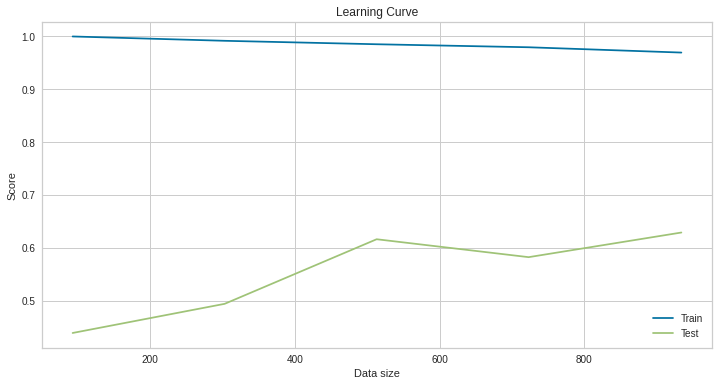

In [43]:
plt.figure(figsize=(12,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), linewidth=4)
plt.plot(train_sizes, np.mean(test_scores, axis=1), linewidth=4)
plt.title('Learning Curve')
plt.ylabel('Score', fontsize=16)
plt.xlabel('Data size', fontsize=16)
plt.legend(['Train', 'Test']);

#####Tree Visualization

In [44]:
from sklearn.tree import plot_tree, export_text

In [45]:
best_tree.max_depth

10

`feature_importances_` attribute return the importance value of each feature which is used to predict the results

In [46]:
pd.DataFrame({'features': train_features.columns,
              'importance': best_tree.feature_importances_}
             ).sort_values('importance', ascending=False).head(5) 

,features,importance
59,GarageCars,0.317458
18,YearRemodAdd,0.244405
44,GrLivArea,0.062527
32,BsmtFinSF1,0.059386
15,OverallQual,0.038984


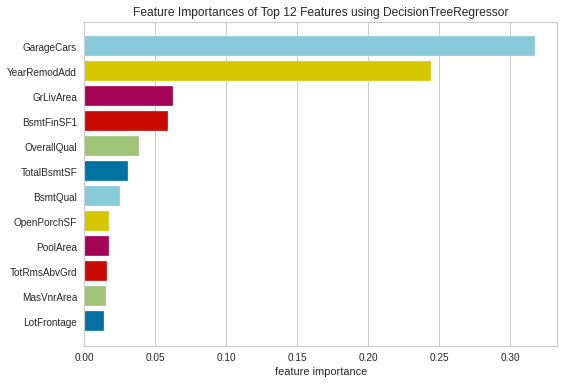

In [47]:
feature_importances(best_tree, train_features, train_targets, labels=train_features.columns, relative=False, topn=12);

Number of `Garage Cars` and `Remodel date` are the most importance features with Decision Tree.

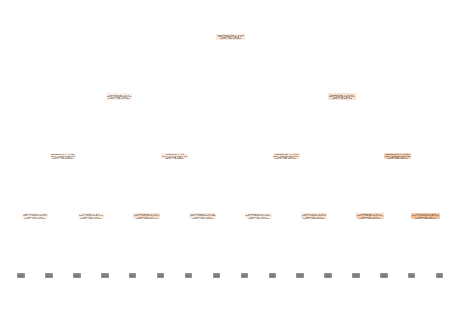

In [48]:
plot_tree(best_tree, feature_names=train_features.columns, max_depth=3, filled=True);

In [49]:
tree_text = export_text(best_tree, max_depth=5, feature_names=train_features.columns.to_list())

##### Prediction Result

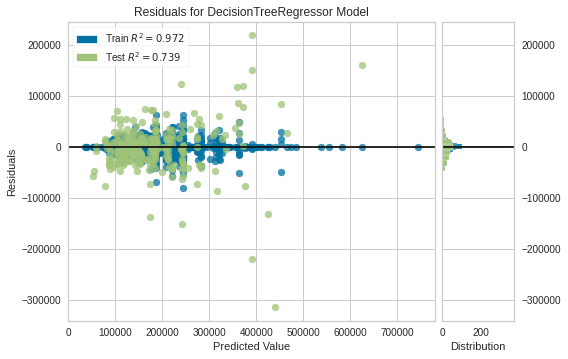

In [50]:
residuals_plot(best_tree, train_features, train_targets, val_features, val_targets);

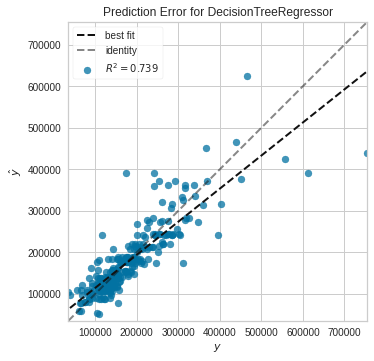

In [51]:
prediction_error(best_tree, train_features, train_features, val_features, val_targets);

####**Gradient Boosting Tree**
Grandient Boosting Machine:
Training Decision Tree to reduce the loss and improve results from previous iteration

1. Use average of target column as initial input
2. The model is trained to compute the different between the previous predictions and target
3. Use learning rate to scale the prediction
4. Improved prediction will be obtained from the scaled prediction + previous prediction
5. Repeat step 2-5 

Using `xgboost` library to build Tree Boosting model

In [52]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

Hyperparameter tuning

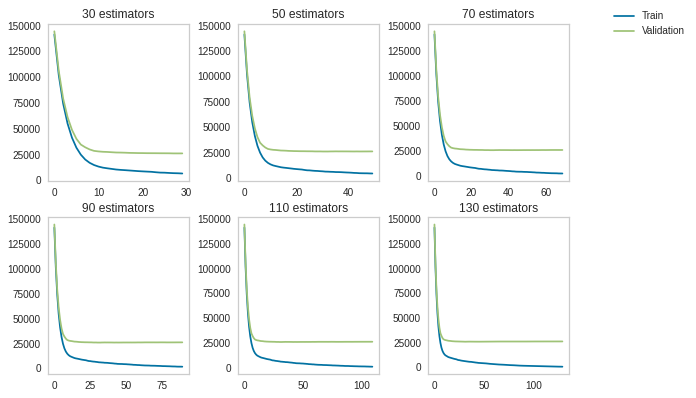

In [53]:
n_estimators = range(30, 150, 20)

for i, n_estimator in enumerate(n_estimators):
  xgb_tree = XGBRegressor(n_estimators=n_estimator)
  xgb_tree.fit(train_features, train_targets, 
               eval_set=[(train_features, train_targets), (val_features, val_targets)], 
               verbose=False, eval_metric='rmse')

  result = xgb_tree.evals_result()

  plt.subplot(2, 3, i+1)
  plt.grid(False)
  plt.plot(result['validation_0']['rmse'], label='Train',)
  plt.plot(result['validation_1']['rmse'], label='Test')
  plt.title(f'{n_estimator} estimators')

plt.figlegend(['Train', 'Validation'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=0.6, w_pad=.4, h_pad=.4);

In [54]:
xgb_tree = XGBRegressor(n_estimator=130, max_depth=9, randome_state=42, learning_rate=1e-2, n_jobs=-1)

In [55]:
%%time
xgb_tree.fit(train_features, train_targets)

[10:04:00] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimator", "randome_state" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


CPU times: user 1.36 s, sys: 6.47 ms, total: 1.37 s
Wall time: 712 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=130, n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, randome_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#####Evaluation

Using `K-fold` cross-validation methods

In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [ ]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# split the current train_features into train and validation set
for train_idx, val_idx in kfold.split(train_features):
  X_train, y_train = train_features.iloc[train_idx], train_targets.iloc[train_idx]
  X_val, y_val = train_features.iloc[val_idx], train_targets.iloc[val_idx]
  xgb_tree = XGBRegressor(n_estimator=130, max_depth=15, random_state=42, learning_rate=1e-2, n_jobs=-1)
  xgb_tree.fit(X_train, y_train)

train_pred = xgb_tree.predict(X_train)
val_pred = xgb_tree.predict(X_val)

  # compute cross validation score
train_csv = cross_val_score(xgb_tree, X_train, y_train, cv=kfold)
val_csv = cross_val_score(xgb_tree, X_val, y_val, cv=kfold)

  # compute r2 score
train_r2 = r2_score(train_pred, y_train)
val_r2 = r2_score(val_pred, y_val)

  
print(f'Training r2 Score: {train_r2: >4f} / Test r2 Score: {val_r2: >4f}')
print(f'Training Cross-Validation Score: {np.mean(train_csv): >4f}')
print(f'Validation-set Cross-Validation Score: {np.mean(val_csv): >4f}')

#####Visualization

We can use `plot_tree` from `xgboost` to display tree graph or `dump` tree into text

In [58]:
from xgboost import plot_tree

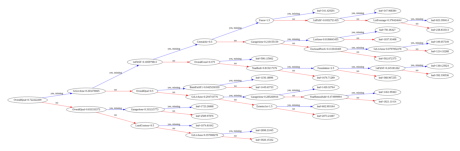

In [59]:
tree_graph = plot_tree(xgb_tree, rankdir='LR', num_trees=10)

getting `features_importances_` score

In [60]:
from xgboost import plot_importance

In [61]:
pd.DataFrame({'features': train_features.columns,
            'importance': xgb_tree.feature_importances_}).sort_values('importance', ascending=False).head(4)

,features,importance
15,OverallQual,0.431636
47,FullBath,0.175817
44,GrLivArea,0.054789
59,GarageCars,0.039320


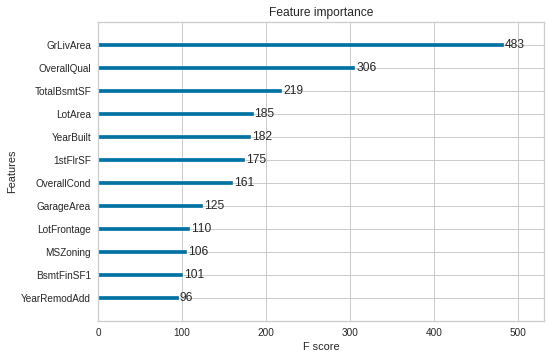

In [62]:
plot_importance(xgb_tree, max_num_features=12)

### **Random Forest**

#### Sklearn RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import validation_curve

Hyperparameters Tuning with `validation curve`

In [64]:
from sklearn.model_selection import validation_curve

In [65]:
validation_curve(
  RandomForestRegressor(), train_features, train_targets, param_name="max_depth",
  param_range=range(10, 40), cv=10, scoring="r2", n_jobs=-1);

In [66]:
best_rf = RandomForestRegressor(150, max_depth=12)
best_rf.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
best_rf.score(train_features, train_targets), best_rf.score(val_features, val_targets)

(0.9778040978837991, 0.8883989330033744)

##### Random Forest Visualization

In [68]:
from yellowbrick.model_selection import feature_importances

In [69]:
pd.DataFrame({'features': train_features.columns,
              'importance': best_rf.feature_importances_}).sort_values('importance', ascending=False).head()

,features,importance
15,OverallQual,0.544726
44,GrLivArea,0.127472
36,TotalBsmtSF,0.037022
41,1stFlrSF,0.031586
32,BsmtFinSF1,0.029357


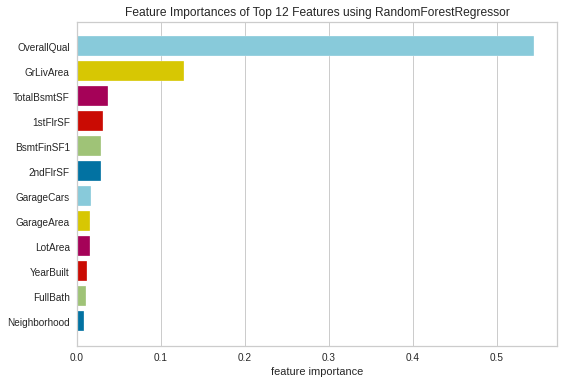

In [70]:
feature_importances(best_rf, train_features, train_targets, labels=train_features.columns,
                    relative=False, topn=12);

##### Prediction Result

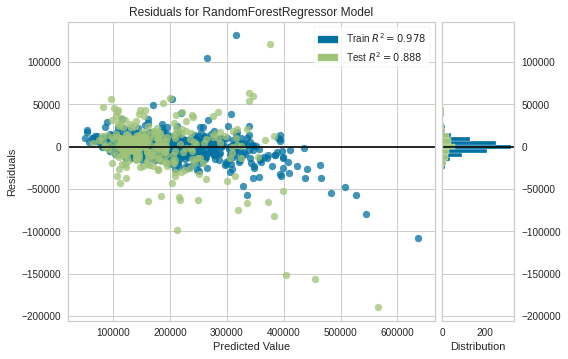

In [71]:
residuals_plot(best_rf, train_features, train_targets, val_features, val_targets);

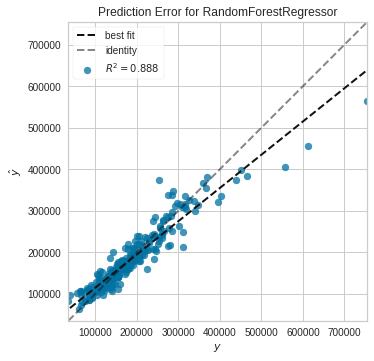

In [72]:
prediction_error(best_rf, train_features, train_targets, val_features, val_targets);

#### Gradient Boosting Random Forest

##### Training

In [73]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [74]:
xgb_rf = XGBRFRegressor(random_state=42, learning_rate=1e-2, max_depth=8, num_parallel_tree=100)

##### Evaluation

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from xgboost import plot_importance

In [87]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)


for train_idx, val_idx in kfold.split(train_features):
  X_train, y_train = train_features.iloc[train_idx], train_targets.iloc[train_idx]
  X_val, y_val = train_features.iloc[val_idx], train_targets.iloc[val_idx]

xgb_rf = XGBRFRegressor(random_state=42, learning_rate=1e-2, max_depth=8, num_parallel_tree=100)
xgb_rf.fit(X_train, y_train)

train_pred = xgb_rf.predict(X_train)
val_pred = xgb_rf.predict(X_val)

train_csv = cross_val_score(xgb_rf, X_train, y_train, cv=kfold)
val_csv = cross_val_score(xgb_rf, X_val, y_val, cv=kfold)

train_r2 = r2_score(y_train, train_pred)
val_r2 = r2_score(y_val, val_pred)

  
print(f'Training r2 Score: {train_r2: >4f} / Test r2 Score: {val_r2: >4f}')
print(f'Training Cross-Validation Score: {np.mean(train_csv): >4f}')
print(f'Validation-set Cross-Validation Score: {np.mean(val_csv): >4f}')

Training r2 Score: -5.249681 / Test r2 Score: -6.056393
Training Cross-Validation Score: -5.320512
Validation-set Cross-Validation Score: -6.775769


Features importance of xgboost RandomForest

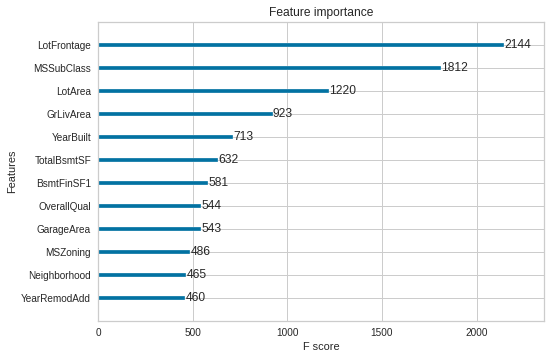

In [78]:
plot_importance(xgb_rf, max_num_features=12)

#####Model Visualization 

In [79]:
from xgboost import plot_tree

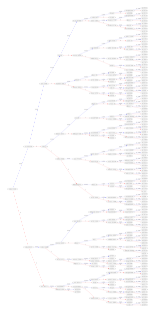

In [89]:
plot_tree(xgb_rf, rankdir='LR', num_trees=10, );

Result Visualization

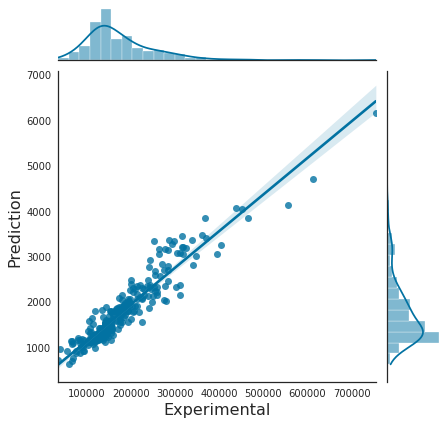

In [100]:
sns.set_style('ticks')
val_pred = xgb_rf.predict(val_features)
h = sns.jointplot(x=val_targets, y=val_pred, kind='reg')
h.set_axis_labels('Experimental', 'Prediction', fontsize=16);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


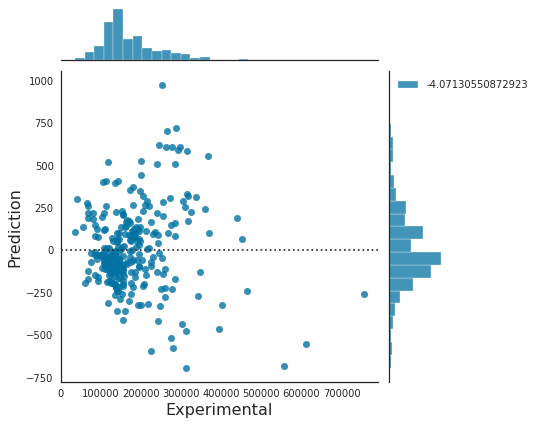

In [102]:
h = sns.jointplot(val_targets, val_pred, kind='resid')
plt.legend([r2_score(val_targets, val_pred)])
h.set_axis_labels('Experimental', 'Prediction', fontsize=16);

### Saving Model

In [83]:
import joblib

In [ ]:
joblib.dump(model, 'model.joblib')